# Trying to install XGBoost
## It doesn't work, so I will use another package.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
!conda install -c conda-forge xgboost -y

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split

# Load Diabetes Data
### Data Reference : IBM Coursera Deep-learning and Reinforcement learning Course week 2 Material.
https://www.coursera.org/learn/deep-learning-reinforcement-learning/supplement/sABhA/keras-demo-activity

In [6]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('diabetes.csv', names=names, header=0)

In [7]:
diabetes_df

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
x = diabetes_df.iloc[:, :-1].values
y = diabetes_df.has_diabetes.values

In [9]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [11]:
xTrain, xTest,yTrain, yTest = train_test_split(x,y,test_size=0.2)

In [12]:
( xTrain.shape, xTest.shape, yTrain.shape,yTest.shape)

((614, 8), (154, 8), (614,), (154,))

In [13]:
dtClassifier =  tree.DecisionTreeClassifier()
dtClassifier.fit(xTrain, yTrain)
yPred = dtClassifier.predict(xTest)

In [14]:
accuracy = np.sum(yTest == yPred)/len(yTest)
accuracy

0.7792207792207793

[Text(158.41637658227847, 209.6742857142857, 'X[1] <= 130.5\ngini = 0.455\nsamples = 614\nvalue = [399, 215]'),
 Text(62.20110759493671, 194.14285714285714, 'X[5] <= 26.95\ngini = 0.329\nsamples = 409\nvalue = [324, 85]'),
 Text(18.364556962025315, 178.61142857142858, 'X[2] <= 94.0\ngini = 0.052\nsamples = 112\nvalue = [109, 3]'),
 Text(11.30126582278481, 163.07999999999998, 'X[5] <= 26.4\ngini = 0.036\nsamples = 108\nvalue = [106, 2]'),
 Text(5.650632911392405, 147.54857142857142, 'X[6] <= 0.672\ngini = 0.02\nsamples = 100\nvalue = [99, 1]'),
 Text(2.8253164556962025, 132.01714285714286, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(8.475949367088607, 132.01714285714286, 'X[6] <= 0.713\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(5.650632911392405, 116.48571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(11.30126582278481, 116.48571428571428, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(16.951898734177213, 147.54857142857142, 'X[0] <= 6.5\ngini = 0.2

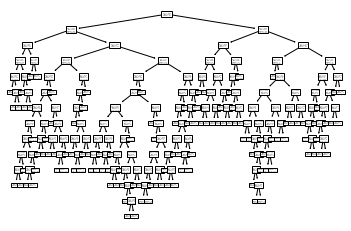

In [15]:
tree.plot_tree(dtClassifier)

In [16]:
!conda install graphviz -y
import graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/jhson/opt/anaconda3/envs/BigData

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       he60d9cb_2         861 KB
    expat-2.4.1                |       h23ab428_2         122 KB
    fontconfig-2.12.6          |       h9850fc5_0         201 KB
    freetype-2.8               |       h12048fb_1         541 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    gettext-0.21.0             |       h7535e17_0         2.6 MB
    glib-2.69.1                |       hdf23fa2_0         2.7 MB
    graphite2-1.3.14           |       h38d11af_0     

ModuleNotFoundError: No module named 'graphviz'